In [121]:
#add auto reload for src function testing
%load_ext autoreload
%autoreload 2

#let's add the project directory to our module path
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
#also import all of our modules
import pandas as pd
import numpy as np
from scipy import stats
from src import data_cleaning

#and here is our data directiory
data_folder = '../../data/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Initial Import

In [2]:
rp_sale = pd.read_csv(data_folder+'EXTR_RPSale.csv', dtype={'Major': 'str', 'Minor':'str'})
res_bldg = pd.read_csv(data_folder+'EXTR_ResBldg.csv', dtype={'Major': 'str', 'Minor':'str', 'ZipCode': 'str'})

# Data filtering

We are looking at property that:
1. was sold in 2019, to see the factors that affect the current market.

2. is residential, as opposed to commercial.

3. was sold, as opposed to foreclosed or transferred as part of a settlement.

4. was not sold via a Quit Claim Deed nor a Statutory Warranty Deed, as these deeds are not typically used by new homeowners.

5. has one building on the parcel, to accurately infer the characteristics of the house sold.



# 1. Was sold in 2019

This filter cuts the most substantial amount of entries from our data set, which records sales from at least a few decades ago.

In [51]:
filter_one = data_cleaning.filter_data_by_year(rp_sale, 2019)
filter_one

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
4,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,...,11,6,3,N,N,N,N,1,8,
118,2999169,919715,0200,2019-07-08,192000,20190712001080,,,,,...,3,2,3,N,N,N,N,1,3,
144,3000673,894444,0200,2019-06-26,185000,20190722001395,,,,,...,3,2,3,N,N,N,N,1,3,
164,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,...,11,6,3,N,N,N,N,1,8,
445,2980836,937630,0695,2019-03-28,550000,20190404001008,,,,,...,3,6,3,N,N,N,N,1,8,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089056,3004408,066000,2210,2019-08-07,41040000,20190812000849,,,,,...,3,7,22,N,N,N,N,18,2,45
2089057,3004408,066000,2225,2019-08-07,41040000,20190812000849,,,,,...,3,7,22,N,N,N,N,18,2,45
2089058,3004408,066000,2195,2019-08-07,41040000,20190812000849,,,,,...,3,7,22,N,N,N,N,18,2,45
2089059,3004408,066000,2220,2019-08-07,41040000,20190812000849,,,,,...,3,7,22,N,N,N,N,18,2,45


It cuts about 2 million entries.

In [52]:
len(filter_one) - len(rp_sale)

-2027736

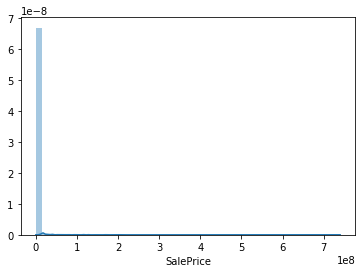

In [124]:
import seaborn as sns

sns.distplot(filter_one.SalePrice)

# 2. Is listed as some sale other than foreclosures, settlements, etc. 
ie a standard sale.

In [106]:
filter_two = filter_one[(filter_one['SaleReason']==1)|(filter_one['SaleReason']==18)]
filter_two

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
4,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,...,11,6,3,N,N,N,N,1,8,
118,2999169,919715,0200,2019-07-08,192000,20190712001080,,,,,...,3,2,3,N,N,N,N,1,3,
144,3000673,894444,0200,2019-06-26,185000,20190722001395,,,,,...,3,2,3,N,N,N,N,1,3,
164,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,...,11,6,3,N,N,N,N,1,8,
445,2980836,937630,0695,2019-03-28,550000,20190404001008,,,,,...,3,6,3,N,N,N,N,1,8,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089056,3004408,066000,2210,2019-08-07,41040000,20190812000849,,,,,...,3,7,22,N,N,N,N,18,2,45
2089057,3004408,066000,2225,2019-08-07,41040000,20190812000849,,,,,...,3,7,22,N,N,N,N,18,2,45
2089058,3004408,066000,2195,2019-08-07,41040000,20190812000849,,,,,...,3,7,22,N,N,N,N,18,2,45
2089059,3004408,066000,2220,2019-08-07,41040000,20190812000849,,,,,...,3,7,22,N,N,N,N,18,2,45


This removes very little of are data. This is unsurprising because most non-standard sales are listed with a zero sale price and were thus filtered out with the previous non-zero filter.

In [107]:
len(filter_two) - len(filter_one)

-6014

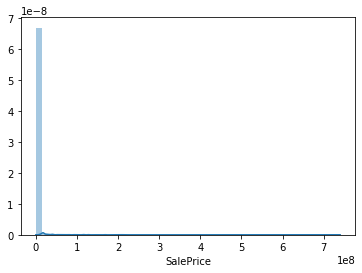

In [125]:
sns.distplot(filter_two.SalePrice)

# 3. Is residential
Because we are targetting prospective homeowners, we don't want to look at commercial buildings.

In [108]:
filter_three = filter_two[(filter_two['PropertyClass'] == 7)|(filter_two['PropertyClass'] == 8)]
filter_three

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
4,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,...,11,6,3,N,N,N,N,1,8,
164,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,...,11,6,3,N,N,N,N,1,8,
445,2980836,937630,0695,2019-03-28,550000,20190404001008,,,,,...,3,6,3,N,N,N,N,1,8,
517,2975376,098400,0450,2019-02-20,409950,20190228000242,,,,,...,11,6,3,N,N,N,N,1,8,
628,2976405,030200,0645,2019-03-04,380000,20190306000786,,,,,...,11,6,3,N,N,N,N,1,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088888,2978617,072207,9103,2019-03-15,0,20190322000293,,,,,...,1,6,15,N,N,Y,N,18,7,18 31 51
2088923,3012006,390497,0150,2019-09-18,850000,20190925001198,,,,,...,11,6,3,N,N,N,N,1,8,
2088953,2974971,246090,0090,2019-02-13,686000,20190226000416,,,,,...,11,6,3,N,N,N,N,1,8,
2088987,2998779,143800,0420,2019-07-09,695000,20190711000444,,,,,...,11,6,3,N,N,N,N,1,8,


This is a substantial filter, removing approximately 25% of our data.

In [109]:
len(filter_three) - len(filter_two)

-13117

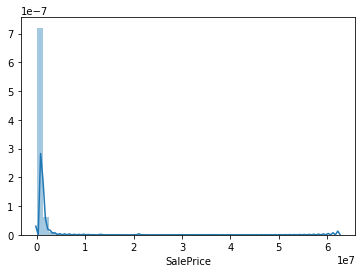

In [126]:
sns.distplot(filter_three.SalePrice)

# 4. Was not sold for zero dollars using a Quit Claim or Statutory Warranty Deed

In [110]:
quit_claim = (filter_three['SaleInstrument']==15) & (filter_three['SalePrice']==0)
stat = (filter_three['SaleInstrument']==3)&(filter_three['SalePrice']==0)
filter_four = filter_three[~stat&~quit_claim]
filter_four


,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
4,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,...,11,6,3,N,N,N,N,1,8,
164,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,...,11,6,3,N,N,N,N,1,8,
445,2980836,937630,0695,2019-03-28,550000,20190404001008,,,,,...,3,6,3,N,N,N,N,1,8,
517,2975376,098400,0450,2019-02-20,409950,20190228000242,,,,,...,11,6,3,N,N,N,N,1,8,
628,2976405,030200,0645,2019-03-04,380000,20190306000786,,,,,...,11,6,3,N,N,N,N,1,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088772,3001420,757820,0400,2019-07-19,930000,20190726000178,,,,,...,11,6,3,N,N,N,N,1,8,
2088923,3012006,390497,0150,2019-09-18,850000,20190925001198,,,,,...,11,6,3,N,N,N,N,1,8,
2088953,2974971,246090,0090,2019-02-13,686000,20190226000416,,,,,...,11,6,3,N,N,N,N,1,8,
2088987,2998779,143800,0420,2019-07-09,695000,20190711000444,,,,,...,11,6,3,N,N,N,N,1,8,


This is our second most substantial filter, removing about a third of our 2019 sales data.

In [111]:
len(filter_four) - len(filter_three)

-9927

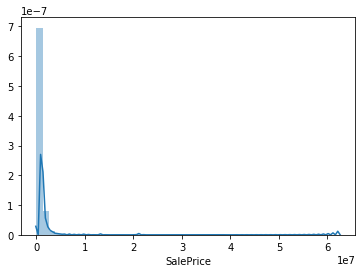

In [127]:
sns.distplot(filter_four.SalePrice)

# 5. Property is on a parcel that contains only one building.

Because the sales data does not have a way to specify which building on a given parcel is being sold, we limited our data set to only include parcels that have one building one them.

## Creating PINS
In order to find which parcels have multiple buildings on them, we will ned the resbldg data set and a way to join that dataset with our sales dataset.

In [112]:
res_bldg = data_cleaning.add_PIN_column(res_bldg)
filter_four = data_cleaning.add_PIN_column(filter_four)

/home/max/flatiron/chi_ds/module_2/week_3/projects/mod2_housing_sales/src/data_cleaning.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Major'] = df['Major'].apply(str)
/home/max/flatiron/chi_ds/module_2/week_3/projects/mod2_housing_sales/src/data_cleaning.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Minor'] = df['Minor'].apply(str)
/home/max/flatiron/chi_ds/module_2/week_3/projects/mod2_housing_sales/src/data_cleaning.py:48: SettingWithCopyWarning: 
A value is trying to be set on a cop

# Filtering by number of buildings per parcel

First I grouped the res_bldg data by PIN and then counted the number of buildings.

In [113]:
number_of_buildings = res_bldg.groupby('PIN').BldgNbr.count()
number_of_buildings.sort_values()

PIN
0000400001     1
6127600115     1
6127600110     1
6127600105     1
6127600100     1
              ..
2422079026    16
2722059164    19
0822119001    21
3223059036    28
1522049091    31
Name: BldgNbr, Length: 509682, dtype: int64

### Then I created a dataframe with only the pins that have one building.

In [114]:
one_building_parcels = pd.DataFrame(number_of_buildings[number_of_buildings==1].index) 
one_building_parcels = one_building_parcels.set_index('PIN')
one_building_parcels

""
PIN
0000400001
0001000003
0001000009
0001000035
0001000040
...
9906000060
9906000065
9906000080


### Then I did an inner join on the sales data to find the overlap between 2019 sales and parcels that have only one building on them.

In [115]:
filter_five = pd.merge(filter_four, one_building_parcels, how='inner', on='PIN')
filter_five

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,...,6,3,N,N,N,N,1,8,,2130430120
1,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,...,6,3,N,N,N,N,1,8,,9406520630
2,2980836,937630,0695,2019-03-28,550000,20190404001008,,,,,...,6,3,N,N,N,N,1,8,,9376300695
3,2975376,098400,0450,2019-02-20,409950,20190228000242,,,,,...,6,3,N,N,N,N,1,8,,0984000450
4,2976405,030200,0645,2019-03-04,380000,20190306000786,,,,,...,6,3,N,N,N,N,1,8,10,0302000645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29569,3001420,757820,0400,2019-07-19,930000,20190726000178,,,,,...,6,3,N,N,N,N,1,8,,7578200400
29570,3012006,390497,0150,2019-09-18,850000,20190925001198,,,,,...,6,3,N,N,N,N,1,8,,3904970150
29571,2974971,246090,0090,2019-02-13,686000,20190226000416,,,,,...,6,3,N,N,N,N,1,8,,2460900090
29572,2998779,143800,0420,2019-07-09,695000,20190711000444,,,,,...,6,3,N,N,N,N,1,8,,1438000420


This has a noticable effect on the data.

In [116]:
len(filter_five) - len(filter_four)

-2731

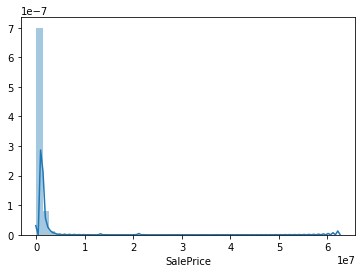

In [128]:
sns.distplot(filter_five.SalePrice)

# Outlier removal

In [122]:
z = np.abs(stats.zscore(filter_five.SalePrice))
no_outliers = filter_five[z < 3]

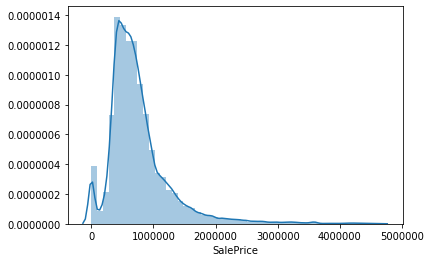

In [129]:
sns.distplot(no_outliers.SalePrice)

# Renovated!!!

In [38]:
# test = pd.merge(filter_five, res_bldg, how='inner', on='PIN') 

In [40]:
# test[test['YrRenovated']<2019]

,ExciseTaxNbr,Major_x,Minor_x,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,...,0,0,0,1989,0,0,0,0,3,0
1,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,...,1,0,0,1994,0,0,0,0,3,2500
2,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,...,0,0,0,1986,0,0,0,0,3,0
3,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,...,1,0,0,1980,0,0,0,0,3,0
4,2980648,797320,2320,2019-03-27,540000,,,,,,...,0,0,0,1930,0,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28766,2972689,929085,0760,2019-01-25,1205000,20190206001611,,,,,...,0,0,0,1989,0,0,0,0,3,0
28767,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,...,0,0,0,1944,0,0,0,0,4,0
28768,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,...,1,0,1,1958,0,0,0,0,3,0
28769,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,...,0,0,0,1947,2009,0,0,0,3,0


# Final PINs creation

I will create a csv containing only the unique pins of the properties that fall under our criteria. The PIN csv will be created from the unique values of the PIN column from my filter_five dataframe. This PINS.csv file can be used to filter any additional datasets we have.

In [131]:
unique_pins = filter_five.PIN.unique()

PINS = pd.DataFrame(unique_pins, columns=['PIN']).set_index('PIN')
PINS.to_csv(data_folder+'PINS.csv')
PINS

""
PIN
2130430120
9406520630
9376300695
0984000450
0302000645
...
7578200400
3904970150
2460900090


# Export

In [132]:
res_bldg_final = pd.merge(res_bldg, PINS, on='PIN', how='inner')
res_bldg_final

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,...,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,PIN
0,046100,1720,1,1,7330 13TH AVE NW 98117,7330,,,13TH,AVE,...,0,0,2019,0,0,0,0,3,0,0461001720
1,046100,4710,1,1,7041 9TH AVE NW,7041,,,9TH,AVE,...,0,0,2013,0,0,0,0,3,0,0461004710
2,009830,0030,1,1,1827 298TH CRESENT SE 98024,1827,,,298TH CRESENT,,...,0,0,2016,0,0,0,0,3,0,0098300030
3,010060,0800,1,1,33411 28TH PL SW 98023,33411,,,28TH,PL,...,0,0,1976,0,0,0,0,4,0,0100600800
4,010060,0950,1,1,33422 29TH PL SW 98023,33422,,,29TH,PL,...,0,1,1976,0,0,0,0,5,0,0100600950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28605,369390,0885,1,1,3011 NW 69TH ST,3011,,NW,69TH,ST,...,0,0,2014,0,0,0,0,3,0,3693900885
28606,370890,0034,1,1,3225 W MERCER WAY 98040,3225,,W,MERCER,WAY,...,1,0,1988,2010,0,0,0,3,0,3708900034
28607,372380,0072,1,1,5419 S LUCILE ST 98118,5419,,S,LUCILE,ST,...,0,1,1959,0,0,0,0,3,0,3723800072
28608,375060,2817,1,1,37419 47TH AVE S 98001,37419,,,47TH,AVE,...,0,0,1946,0,0,0,0,4,0,3750602817


In [133]:
res_bldg_final.to_csv(data_folder+'EXTR_ResBldg_final.csv')

filter_five.to_csv(data_folder+'EXTR_RPSale_final.csv')

# Adding more data

First, make sure you import the original csv with the right arguments, it may need special encoding, and it may need you to specifiy data type.

In [135]:
#note that some csv's need tobe read with an encoding argument set to 'latin-1'
parcel = pd.read_csv(data_folder+'EXTR_Parcel.csv', dtype={'Major': 'string', 'Minor':'string'}, encoding='latin-1')
accessory = pd.read_csv(data_folder+'EXTR_Accessory_V.csv', dtype={'Major': 'string', 'Minor':'string'}, encoding='latin-1')

Then, filter the file by our PINS

In [136]:
parcel = data_cleaning.add_PIN_column(parcel)
accessory = data_cleaning.add_PIN_column(accessory)

Check to make sure it looks okay.

In [137]:
parcel.head()

,Major,Minor,PropName,PlatName,PlatLot,PlatBlock,Range,Township,Section,QuarterSection,...,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems,PIN
0,916110,0346,,WARDALL PARK ADD,20-21-22,3,3,24,14,SW,...,N,N,N,N,N,N,N,N,N,9161100346
1,132606,9228,,NaN,,,6,26,13,SE,...,N,N,N,N,N,N,N,N,N,1326069228
2,329870,0012,,HIGHLAND PARK,2,1,4,24,31,SW,...,N,N,N,N,N,N,N,N,N,3298700012
3,884530,0050,,UPPERS H S LIBERTY HEIGHTS ADD,9,1,3,24,26,SW,...,N,N,N,N,N,N,N,N,N,8845300050
4,261730,0220,,FOUR LAKES,2,3,6,23,27,NE,...,N,N,N,N,N,N,N,N,N,2617300220


In [138]:
accessory.head()

,Major,Minor,AccyType,AccyDescr,Quantity,Size,Unit,Grade,EffYr,PcntNetCondition,AccyValue,DateValued,UpdatedBy,UpdateDate,PIN
0,414010,0060,17,,8,0,0,0,0,0,0,1900-01-01 00:00:00,,1900-01-01 00:00:00,4140100060
1,423240,1120,17,,4,0,0,0,0,0,0,1900-01-01 00:00:00,,1900-01-01 00:00:00,4232401120
2,423540,0735,14,,33,0,0,0,0,0,0,1900-01-01 00:00:00,,1900-01-01 00:00:00,4235400735
3,430220,1165,17,,4,0,0,0,0,0,0,1900-01-01 00:00:00,,1900-01-01 00:00:00,4302201165
4,430220,1170,17,,4,0,0,0,0,0,0,1900-01-01 00:00:00,,1900-01-01 00:00:00,4302201170


Filter with the list of PINs

In [139]:
PINS = pd.read_csv(data_folder+'PINS.csv', dtype={'PIN': 'string'})
PINS = PINS.set_index('PIN')


parcel_final = parcel.join(PINS, how='inner', on='PIN')
print('finished parcels')

accessory_final = accessory.join(PINS, how='inner', on='PIN')
print('finished accessory')

finished parcels
finished accessory


Export it the data file, with the suffix '_final'

In [140]:
parcel_final.to_csv(data_folder+'EXTR_Parcel_final.csv')
accessory_final.to_csv(data_folder+'EXTR_Accessory_V_final.csv')